## Training U-Net for Image Segmentation

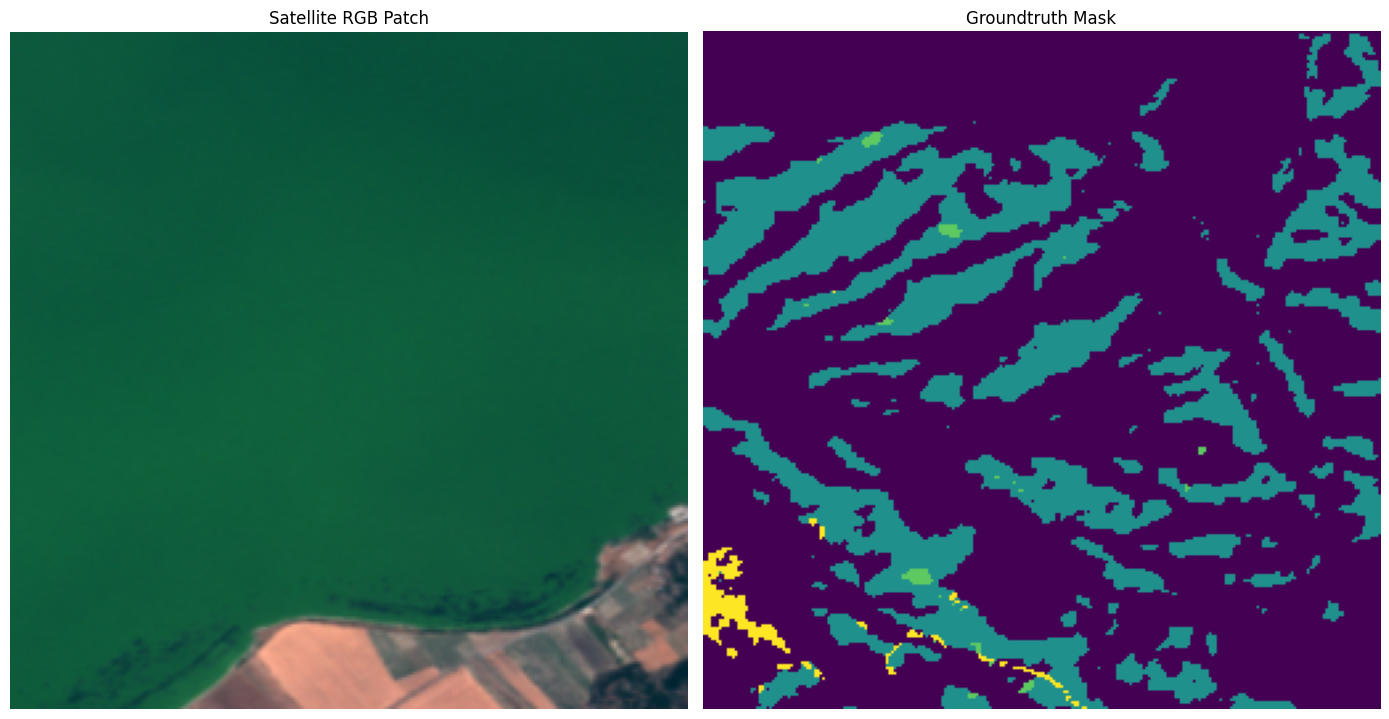

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
pred = np.load(
    "/home/ubuntu/bdrs_ex_1/data/test_patches/images/patch_0463.npy"
)  # shape: (bands, H, W)
gt = np.load(
    "/home/ubuntu/bdrs_ex_1/data/patches/masks/patch_0944_mask.npy"
)  # shape: (H, W)

# Select 3 bands to form RGB (adjust indices as needed)
# For Sentinel-2, common RGB bands: B04 (red), B03 (green), B02 (blue)
rgb = np.stack(
    [
        pred[3],  # Red (B04)
        pred[2],  # Green (B03)
        pred[1],  # Blue (B02)
    ],
    axis=-1,
)

# Normalize the RGB image for display (0-1 range)
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].imshow(rgb_norm)
ax[0].set_title("Satellite RGB Patch")
ax[0].axis("off")

ax[1].imshow(gt)  # Use colormap for categorical masks
ax[1].set_title("Groundtruth Mask")
ax[1].axis("off")

plt.tight_layout()
plt.show()

## Loading Dataset

In [ ]:
from torch.utils.data import DataLoader
import utils.load_dataset as loader

dataset = loader.SatelliteDataset(
    image_dir="data/patches/images", mask_dir="data/patches/masks"
)

## Data Preprocessing

In [2]:
from torch.utils.data import random_split

# split dataset to 80% for train and 20% for validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

ds_train, ds_val = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(ds_train, batch_size=32, shuffle=True)
val_loader = DataLoader(ds_val, batch_size=32, shuffle=True)

In [ ]:
# iter function to load batches
x_train, y_train = next(iter(train_loader))
x_val, y_val = next(iter(val_loader))

### Normalization 